# Questions to be Answered

1. ROI top 20%, 30%, or 50% against all with risky loans
2. Default rate for these things

In [30]:
%pylab inline
from sklearn.externals import joblib
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import pandas as pd
from patsy import dmatrices
import sys
sys.path.append("../scripts")

Populating the interactive namespace from numpy and matplotlib


In [47]:
def generate_roc(X, y, model):
    """
    Takes a vector of features, X, a vector of targets, y and draws an
    ROC along with AUC scores.

    :param X:
    :param y:
    :param model: an sklearn ALREADY FITTED classifer
    :return:

    Notes
    ---
    - Meant to be run in pylab inline mode.
    - Only works with classification models.

    """
    model.predict_proba

    y_pred = model.predict_proba(X)[:,1]
    fpr, tpr, thresholds = roc_curve(y, y_pred)

    auc = roc_auc_score(y, y_pred)
    print('AUC: {}'.format(auc))

    plt.plot(fpr, tpr, label='ROC Curve. AUC = {0:.2f}'.format(auc))

    plt.plot([0, 1], [0, 1], 'r--')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    
    fig, ax = plt.subplots()

    fig.set_size_inches(12, 8, forward=True)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')


In [33]:
model = joblib.load('../model/rf_model.pkl')

In [34]:
df = pd.read_pickle('../cleaned_df.pkl')

In [35]:
from model import create_matrix

In [36]:
y, X = create_matrix(df)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15,
                                                   random_state=42)

[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.7s finished
/Users/Will/anaconda/envs/py34/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


AUC: 0.6738723432311946


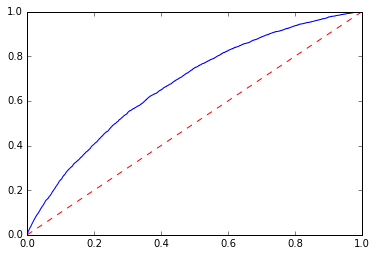

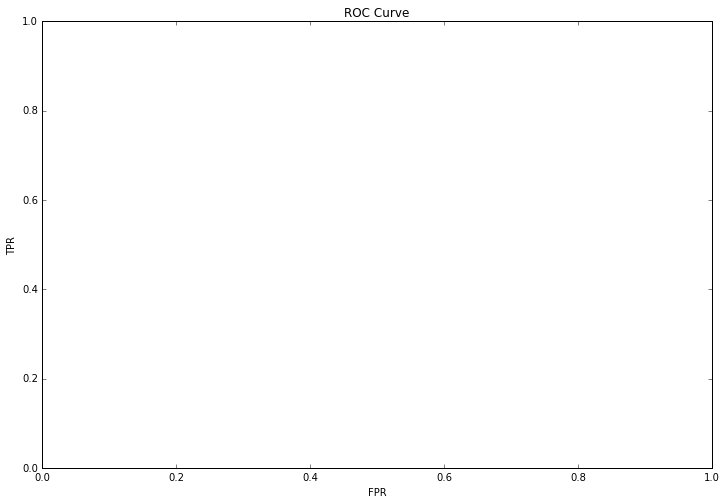

In [48]:
generate_roc(X_test, y_test, model=model)

In [26]:
X_test.shape

(54350,)